# INSIGHTS: Funnel Analysis 
## Funnel Analysis 
## Goal 
The goal is to perform funnel analysis for an e-commerce website. Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product and buy it. At each of these steps, some users will drop off and leave the site. The sequence of pages that leads to conversion is called ‘funnel’ . Data Science can have a tremendous impact on funnel optimization. Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience as well as it often allows to discover bugs.
 
## Challenge Description 

You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:

The ﬁrst page is the __home page__. When you come to the site for the ﬁrst time, you can only land on the __home page__ as a ﬁrst page. 

From the __home page__, the user can perform a search and land on the __search page__. 

From the __search page__, if the user clicks on a product, she will get to the __payment page__, where she is asked to provide payment information in order to buy that product. 

If she does decide to buy, she ends up on the __conﬁrmation page__ 

The company CEO isn’t very happy with the __company sales__ and, especially, __sales coming from new user__. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you can create hypotheses on how conversion rate could be improved.

Speciﬁcally, she is interested in : 

### A full picture of funnel conversion rate for both desktop and mobile 

### Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 350)

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# read data

# home = pd.read_csv('Data/Funnel_Analysis/home_page_table.csv', names=['user_id', 'home_page'], skiprows=0)
# confirmation = pd.read_csv('Data/Funnel_Analysis/payment_confirmation_table.csv', names=['user_id', 'confirmation_page'])
# payment = pd.read_csv('Data/Funnel_Analysis/payment_page_table.csv', names=['user_id', 'payment_page'])
# search = pd.read_csv('Data/Funnel_Analysis/search_page_table.csv', names=['user_id', 'search_page'])
# user = pd.read_csv('Data/Funnel_Analysis/user_table.csv')

home = pd.read_csv('Data/Funnel_Analysis/home_page_table.csv')
confirmation = pd.read_csv('Data/Funnel_Analysis/payment_confirmation_table.csv')
payment = pd.read_csv('Data/Funnel_Analysis/payment_page_table.csv')
search = pd.read_csv('Data/Funnel_Analysis/search_page_table.csv')
user = pd.read_csv('Data/Funnel_Analysis/user_table.csv')

# rename the columns, since later we find the home/search/payment/confirmation dataset use
# the same name, 'page', for the page columns.

home.columns = ['user_id', 'home_page']
confirmation.columns = ['user_id', 'confirmation_page']
payment.columns = ['user_id', 'payment_page']
search.columns = ['user_id', 'search_page']

In [3]:
# files = [home, confirmation, payment, search, user]
files = [user, home, search, payment, confirmation]

# file_names = ['home', 'confirmation', 'payment', 'search', 'user']
file_names = ['user', 'home', 'search', 'payment', 'confirmation']

take a look at the data / skip through the data

In [4]:
for file in files:
    print(file.head())
    print('##################################################')

   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male
##################################################
   user_id  home_page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page
##################################################
   user_id  search_page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page
##################################################
   user_id  payment_page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3   901286  payment_page
4   195052  payment_page
##################################################
   user_id          confirmation_page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  paym

We find the information and structures are relatively simple in the files. 
The home/search/payment/confirmation data file only contains user_id and page_title.  
We can combine/merge them together so that we have the funnel of user behavior.  
For the user data file, the user_id can be used in the merge process with other files.  
The date contains time series information, from which we may find the impact of some special time period.  
The device and sex are two user features.

In [5]:
for file in files:
    print(file.describe(include='all'))

              user_id        date   device    sex
count    90400.000000       90400    90400  90400
unique            NaN         120        2      2
top               NaN  2015-02-08  Desktop   Male
freq              NaN         877    60200  45325
mean    498709.683473         NaN      NaN    NaN
std     289040.674085         NaN      NaN    NaN
min         17.000000         NaN      NaN    NaN
25%     247978.750000         NaN      NaN    NaN
50%     498267.000000         NaN      NaN    NaN
75%     749789.250000         NaN      NaN    NaN
max     999979.000000         NaN      NaN    NaN
              user_id  home_page
count    90400.000000      90400
unique            NaN          1
top               NaN  home_page
freq              NaN      90400
mean    498709.683473        NaN
std     289040.674085        NaN
min         17.000000        NaN
25%     247978.750000        NaN
50%     498267.000000        NaN
75%     749789.250000        NaN
max     999979.000000        NaN
    

we use the describe function to get some statistical sense about the data in the files.  
There are 90400 users.  
The time window is 120 days. (let's check the start and end dates later.)  
There are 60200 desktops among 90400 devices.
There are 45324 males among 90400 users.  
The funnel goes like this:  
home(90400) -> search(45200) -> payment(6030) -> confirmation(452)  
Let's see how we can dig into details and visulize the information with plots.

In [6]:
for name, file in zip(file_names, files):
    print(name, file.shape)

user (90400, 4)
home (90400, 2)
search (45200, 2)
payment (6030, 2)
confirmation (452, 2)


The funnel goes like this:  
home(90400) -> search(45200) -> payment(6030) -> confirmation(452)  

In [9]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
user_id    90400 non-null int64
date       90400 non-null object
device     90400 non-null object
sex        90400 non-null object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [12]:
for name in file_names:
    print(name, len(eval(name)['user_id'].values) == len(eval(name)['user_id'].unique()))

user True
home True
search True
payment True
confirmation True


There are only unique user_ids in the user_id columns.

In [13]:
user_set = set(user['user_id'].values)
home_set = set(home['user_id'].values)

In [14]:
len(home_set.intersection(user_set)) == len(home_set)

True

the set of users in the home file is a subset of the user set.

In [15]:
for i in range(1, len(file_names)):
    pre_step = file_names[i-1]
    post_step = file_names[i]
    
    pre_set = set(eval(pre_step)['user_id'].values)
    post_set = set(eval(post_step)['user_id'].values)
    
    print(post_step, len(post_set.intersection(pre_set)) == len(post_set))

home True
search True
payment True
confirmation True


The set of users in the next step, such as the 'search' is the next step of 'home', is a subset of the set of previous users. This point holds for all the data files. So the data is reliable from this sence.

Analyze the feature of users
+ such as sex
+ such as device

In [16]:
user.groupby(['device']).size()

device
Desktop    60200
Mobile     30200
dtype: int64

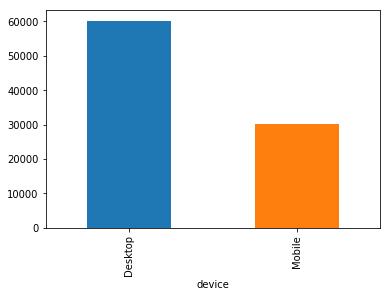

In [17]:
user.groupby(['device']).size().plot(kind='bar')

the number of desktop users is about two times of that of mobile users.

In [20]:
user.groupby(['sex']).size()

sex
Female    45075
Male      45325
dtype: int64

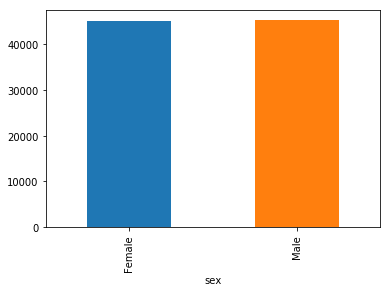

In [21]:
user.groupby(['sex']).size().plot(kind='bar')

The number of female and male users are almost the same.

In [22]:
import seaborn as sns
sns.set(style='darkgrid')

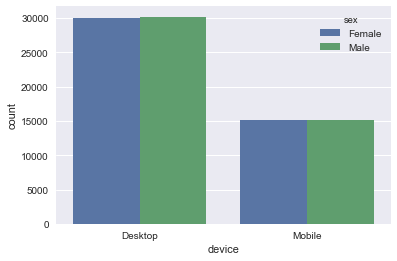

In [23]:
ax = sns.countplot(x='device', hue='sex', data=user)

This plot shows in each device, the number of female and male users are very close to each other.

In [24]:
data_join = pd.merge(user, home, how='left', on='user_id')
data_join = data_join.merge(search, how='left', on='user_id')
data_join = data_join.merge(payment, how='left', on='user_id')
data_join = data_join.merge(confirmation, how='left', on='user_id')

In [25]:
data_join.head(5)

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


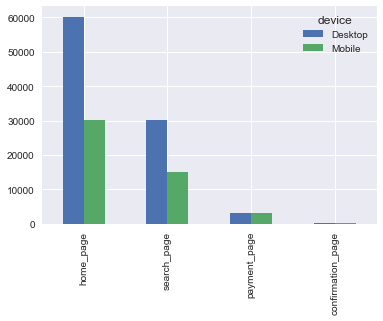

In [26]:
data_join.groupby(['device'])['home_page', 'search_page', 'payment_page', 'confirmation_page'].count().T.plot(kind='bar')

This plot shows how the number of desktop and mobile users changes from the home to confirmation page.  
During the home and search stage, the amount of desktop users is two times of that of the mobile users.  
However, they have similar amounts in the payment and confirmation stage.  
In the whole web browsing process, the amount of users drops dramatically.  
From home to search, it becomes half. Later, it drops to less than half.  

we can check the drop rate/conversion rate or drop reason/conversion reason later.

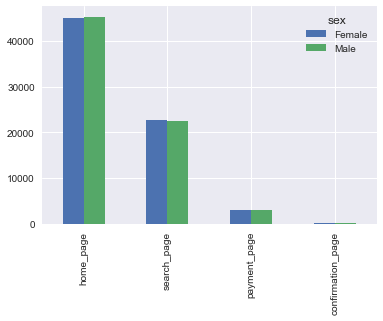

In [28]:
data_join.groupby(['sex'])['home_page', 'search_page', 'payment_page', 'confirmation_page'].count().T.plot(kind='bar')

Different from the device distribution, the numbers of female and male users keep close to each other.

In [29]:
import seaborn as sns
sns.set(style='darkgrid')

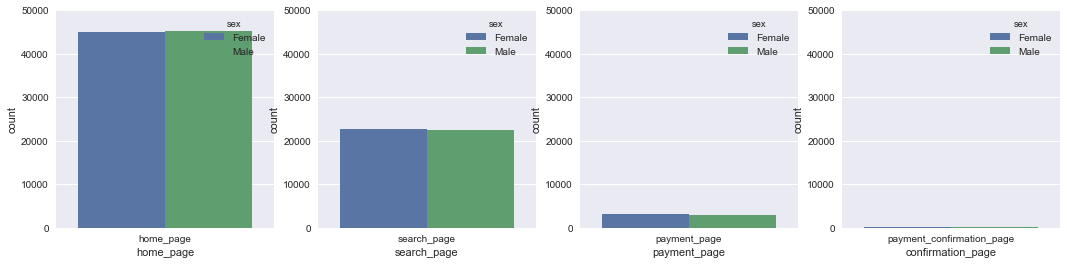

In [30]:
fig, ax_count = plt.subplots(1, 4, figsize=(18,4))
ax_count[0].set_ylim(0,50000)
ax_count[1].set_ylim(0,50000)
ax_count[2].set_ylim(0,50000)
ax_count[3].set_ylim(0,50000)
sns.countplot(x='home_page', hue='sex', data=data_join, ax=ax_count[0])
sns.countplot(x='search_page', hue='sex', data=data_join, ax=ax_count[1])
sns.countplot(x='payment_page', hue='sex', data=data_join, ax=ax_count[2])
sns.countplot(x='confirmation_page', hue='sex', data=data_join, ax=ax_count[3])

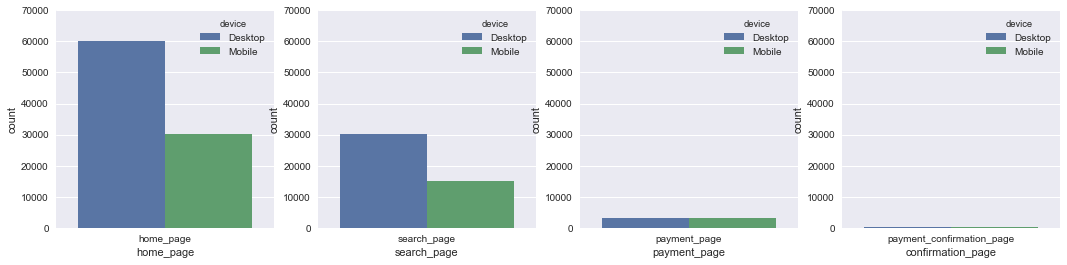

In [31]:
fig, ax_count = plt.subplots(1, 4, figsize=(18,4))
ax_count[0].set_ylim(0,70000)
ax_count[1].set_ylim(0,70000)
ax_count[2].set_ylim(0,70000)
ax_count[3].set_ylim(0,70000)
sns.countplot(x='home_page', hue='device', data=data_join, ax=ax_count[0])
sns.countplot(x='search_page', hue='device', data=data_join, ax=ax_count[1])
sns.countplot(x='payment_page', hue='device', data=data_join, ax=ax_count[2])
sns.countplot(x='confirmation_page', hue='device', data=data_join, ax=ax_count[3])

Above two plots are the repeated/duplicated results of the previous two.

In [32]:
data_join[['user_id', 'home_page', 'search_page', 'payment_page', 'confirmation_page']].count()

user_id              90400
home_page            90400
search_page          45200
payment_page          6030
confirmation_page      452
dtype: int64

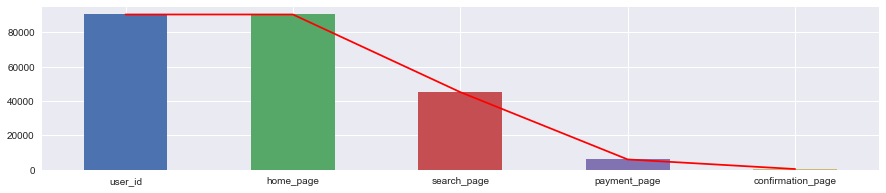

In [33]:
fig, ax = plt.subplots(figsize=(15,3))

data_join[['user_id', 'home_page', 'search_page', 'payment_page', 'confirmation_page']]\
    .count()\
    .plot(kind='bar', ax=ax)

data_join[['user_id', 'home_page', 'search_page', 'payment_page', 'confirmation_page']]\
    .count()\
    .plot(kind='line', ax=ax, color='r')

Here we have an overall view of how the number of users changes.

Having an idea about the drop rate/conversion rate is the topic below.

In [34]:
device_group = data_join.groupby(['device'])['home_page', 'search_page', 'payment_page', 'confirmation_page'].count()
device_stack = device_group.stack()
device_stack

device                    
Desktop  home_page            60200
         search_page          30100
         payment_page          3010
         confirmation_page      150
Mobile   home_page            30200
         search_page          15100
         payment_page          3020
         confirmation_page      302
dtype: int64

In [35]:
data_join.groupby(['device'])['home_page', 'search_page', 'payment_page', 'confirmation_page'].count().T

device,Desktop,Mobile
home_page,60200,30200
search_page,30100,15100
payment_page,3010,3020
confirmation_page,150,302


In [36]:
data_join[data_join['device'] == 'Desktop'][['home_page', 'search_page', 'payment_page', 'confirmation_page']].count()

home_page            60200
search_page          30100
payment_page          3010
confirmation_page      150
dtype: int64

In [37]:
device_group.loc['Desktop']

home_page            60200
search_page          30100
payment_page          3010
confirmation_page      150
Name: Desktop, dtype: int64

In [38]:
device_stack['Desktop']['home_page']

60200

In [39]:
page_drop = pd.DataFrame()
page_drop['home_drop'] = device_group['home_page'] - device_group['search_page']
page_drop['home_converted'] = device_group['search_page']
page_drop['search_drop'] = device_group['search_page'] - device_group['payment_page']
page_drop['search_converted'] = device_group['payment_page']
page_drop['payment_drop'] = device_group['payment_page'] - device_group['confirmation_page']
page_drop['payment_converted'] = device_group['confirmation_page']
page_drop

,home_drop,home_converted,search_drop,search_converted,payment_drop,payment_converted
device,,,,,,
Desktop,30100,30100,27090,3010,2860,150
Mobile,15100,15100,12080,3020,2718,302


In [41]:
userPage_counts = data_join[['home_page', 'search_page', 'payment_page', 'confirmation_page']].count()
userPage_counts

home_page            90400
search_page          45200
payment_page          6030
confirmation_page      452
dtype: int64

In [42]:
index = ['home_page', 'search_page', 'payment_page', 'confirmation_page']
column = ['total', 'converted', 'converted_rate', 'drop_rate']

In [43]:
pd.DataFrame([userPage_counts])

,home_page,search_page,payment_page,confirmation_page
0,90400,45200,6030,452


In [44]:
userPage_counts.values

array([90400, 45200,  6030,   452], dtype=int64)

In [45]:
def convert_drop(series, index_array, column):
    
    initial = np.zeros((4,4))
    initial[:, 0] = series.values # the first column
    initial[0:3, 1] = initial[1:4, 0] # 2nd
    initial[:, 2] = initial[:,1] / initial[:,0] # 3rd
    initial[:, 3] = 1 - initial[:, 2] # 4th
    desktop_converted = pd.DataFrame(initial, index=index_array, columns=column)
    
    return desktop_converted

In [46]:
desktop_index = [['Desktop'] * 4] + [['home_page', 'search_page', 'payment_page', 'confirmation_page']]
desktop_drop = convert_drop(device_group.loc['Desktop'], desktop_index, column)
desktop_drop

total  converted  converted_rate  drop_rate
Desktop home_page          60200.0    30100.0        0.500000   0.500000
        search_page        30100.0     3010.0        0.100000   0.900000
        payment_page        3010.0      150.0        0.049834   0.950166
        confirmation_page    150.0        0.0        0.000000   1.000000

In [47]:
mobile_index = [['Mobile'] * 4] + [['home_page', 'search_page', 'payment_page', 'confirmation_page']]
mobile_drop = convert_drop(device_group.loc['Mobile'], mobile_index, column)
mobile_drop

total  converted  converted_rate  drop_rate
Mobile home_page          30200.0    15100.0             0.5        0.5
       search_page        15100.0     3020.0             0.2        0.8
       payment_page        3020.0      302.0             0.1        0.9
       confirmation_page    302.0        0.0             0.0        1.0

For both desktop and mobile, the significant user drop happens __from search to payment__ and __from payment to confirmation__.

In [50]:
pd.concat([desktop_drop, mobile_drop])

total  converted  converted_rate  drop_rate
Desktop home_page          60200.0    30100.0        0.500000   0.500000
        search_page        30100.0     3010.0        0.100000   0.900000
        payment_page        3010.0      150.0        0.049834   0.950166
        confirmation_page    150.0        0.0        0.000000   1.000000
Mobile  home_page          30200.0    15100.0        0.500000   0.500000
        search_page        15100.0     3020.0        0.200000   0.800000
        payment_page        3020.0      302.0        0.100000   0.900000
        confirmation_page    302.0        0.0        0.000000   1.000000

In [51]:
device_drop = desktop_drop.append(mobile_drop)
device_drop

total  converted  converted_rate  drop_rate
Desktop home_page          60200.0    30100.0        0.500000   0.500000
        search_page        30100.0     3010.0        0.100000   0.900000
        payment_page        3010.0      150.0        0.049834   0.950166
        confirmation_page    150.0        0.0        0.000000   1.000000
Mobile  home_page          30200.0    15100.0        0.500000   0.500000
        search_page        15100.0     3020.0        0.200000   0.800000
        payment_page        3020.0      302.0        0.100000   0.900000
        confirmation_page    302.0        0.0        0.000000   1.000000

Here I tried two ways, i.e. pd.concat() and df.append(), to combine desktop and mobile result together.

In [181]:
device_drop['converted_rate'] = device_drop['converted_rate'].round(2)
device_drop['drop_rate'] = device_drop['drop_rate'].round(2)

In [182]:
device_drop

total  converted  converted_rate  drop_rate
Desktop home_page          60200.0    30100.0            0.50       0.50
        search_page        30100.0     3010.0            0.10       0.90
        payment_page        3010.0      150.0            0.05       0.95
        confirmation_page    150.0        0.0            0.00       1.00
Mobile  home_page          30200.0    15100.0            0.50       0.50
        search_page        15100.0     3020.0            0.20       0.80
        payment_page        3020.0      302.0            0.10       0.90
        confirmation_page    302.0        0.0            0.00       1.00

Here I round the number to two decimal places. In this way, the table is more clear to read.

## From here we exam the time or date related factors.

In [52]:
data_join.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [53]:
data_join['date'] = pd.to_datetime(data_join['date'])

In [54]:
data_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id              90400 non-null int64
date                 90400 non-null datetime64[ns]
device               90400 non-null object
sex                  90400 non-null object
home_page            90400 non-null object
search_page          45200 non-null object
payment_page         6030 non-null object
confirmation_page    452 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 8.7+ MB


In [55]:
data_join['date'].describe()

count                   90400
unique                    120
top       2015-02-08 00:00:00
freq                      877
first     2015-01-01 00:00:00
last      2015-04-30 00:00:00
Name: date, dtype: object

In [56]:
data_join['date'].min(), data_join['date'].max(), data_join['date'].max() - data_join['date'].min() + pd.Timedelta(days = 1)

(Timestamp('2015-01-01 00:00:00'),
 Timestamp('2015-04-30 00:00:00'),
 Timedelta('120 days 00:00:00'))

In [57]:
data_join['date'].nunique()

120

The whole data spans from Jan. 2015 to Apr. 2015. And the total dates are 120.  
Details: 2015-01-01-2015-04-30

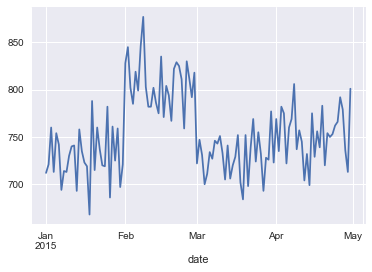

In [63]:
data_join.groupby('date').size().plot()

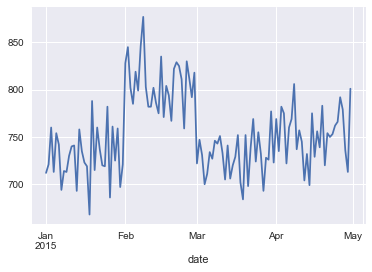

In [59]:
data_join.groupby('date')['home_page'].count().plot()

The line plot of the number of users visiting the home page. There is a small __bump__ or __peak__ during February. We can check what is happening during this time. It could be a special period of time, like __a festival__ or __some shopping events__.

The difference between the number of users in Februray, the peak month, and those in other months is around __50__.

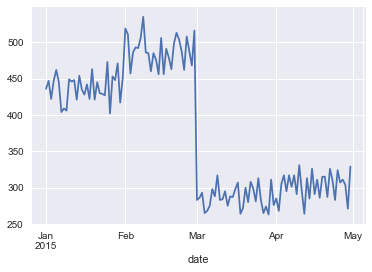

In [60]:
data_join.groupby('date')['search_page'].count().plot()

## try to talk about the reason for the number drop

+ there is a bug on the site
+ there is a bug in the code that logs user behaviors and stores it into some table in database.
+ there is a problem with the query

The number of users hitting on the search page is high in January and Februray, but it dropped suddenly in March.  

The difference is around __150__, much larger than the drop on the home page.

Similar things happen to the number of users visiting the payment page and confirmation page.  
The following drop on the user number hitting payment_page and confirmation_page can be caused by the drop of the number of users visiting the search page.

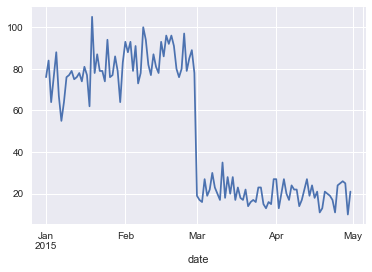

In [61]:
data_join.groupby('date')['payment_page'].count().plot()

The drop is around __60__.

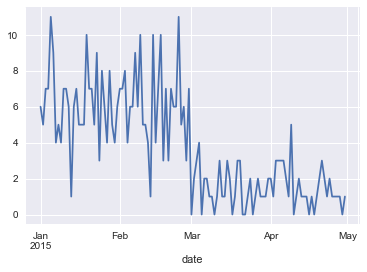

In [62]:
data_join.groupby('date')['confirmation_page'].count().plot()

The drop is around __5__.

In [64]:
data_join.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [65]:
data_deviceGroup = data_join.groupby(['date','device'])['home_page', 'search_page', 'payment_page', 'confirmation_page'].count()
data_deviceUnstack = data_deviceGroup.unstack()

In [66]:
data_deviceUnstack

home_page        search_page        payment_page        confirmation_page       
device       Desktop Mobile     Desktop Mobile      Desktop Mobile           Desktop Mobile
date                                                                                       
2015-01-01       493    219         256    180           47     29                 1      5
2015-01-02       484    237         261    186           44     40                 1      4
2015-01-03       507    253         222    200           22     42                 3      4
2015-01-04       474    239         249    198           38     38                 1      6
2015-01-05       483    271         249    213           37     51                 3      8
2015-01-06       491    251         247    198           34     33                 1      8
2015-01-07       489    205         243    161           27     28                 2      2
2015-01-08       479    235         216    193           31     33                 2      3
2015-01-09       470    243         218    188           37     39                 1      3
2015-01-10       479    251         258    191           44     33                 3      4
2015-01-11       487    253         253    193           34     45                 2      5
2015-01-12       499    242         255    193           42     33                 2      4
2015-01-13       484    209         249    172           37     39                 1      0
2015-01-14       478    280         234    220           45     33                 2      4
2015-01-15       490    245         233    202           35     39                 1      6
2015-01-16       464    259         219    209           41     40                 2      3
2015-01-17       467    252         241    201           38     39                 2      3
2015-01-18       439    229         252    170           36     26                 1      4
2015-01-19       520    268         254    209           55     50                 2      8
2015-01-20       481    234         239    182           43     35                 3      4
2015-01-21       500    260         238    207           43     44                 4      3
2015-01-22       496    241         242    188           42     37                 0      5
2015-01-23       503    217         253    176           45     34                 4      5
2015-01-24       461    258         214    213           39     35                 3      0
2015-01-25       519    263         265    208           46     48                 3      5
2015-01-26       475    211         231    171           40     36                 2      4
2015-01-27       493    268         243    210           28     49                 0      4
2015-01-28       479    246         253    195           41     45                 1      7
2015-01-29       522    237         271    200           48     31                 4      1
2015-01-30       476    221         232    185           37     27                 1      3
...              ...    ...         ...    ...          ...    ...               ...    ...
2015-04-01       516    253         233     52           16     11                 0      2
2015-04-02       487    248         223     45            5      8                 1      0
2015-04-03       522    260         251     54           11      9                 1      2
2015-04-04       511    264         257     60           15     12                 0      3
2015-04-05       490    232         246     49            9     11                 2      1
2015-04-06       508    252         263     54            7     10                 0      3
2015-04-07       493    276         244     57           10     14                 2      0
2015-04-08       528    278         259     58            9     13                 0      1
2015-04-09       487    250         241     50            7     15                 4      1
2015-04-10       513    244         269     62         

## impact of some factors

In [67]:
data_join.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [68]:
data_join['dayofweek'] = data_join['date'].dt.dayofweek
data_join['monthofyear'] = data_join['date'].dt.month
data_join['confirmation_yn'] = data_join['confirmation_page'].isnull().apply(lambda x: 1 if not x else 0)

In [69]:
data_join.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page,dayofweek,monthofyear,confirmation_yn
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN,5,2,0
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN,1,1,0
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN,3,4,0
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN,2,2,0
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN,3,1,0


## impact of 'device'

In [73]:
data_join.groupby(['device'])['confirmation_yn'].agg(['sum', 'count', 'mean']).sort_values(by=['mean'], ascending=False)

,sum,count,mean
device,,,
Mobile,302,30200,0.010000
Desktop,150,60200,0.002492


__Mobile users__ are more likely to finish transactions.  
__Why ?__

## impact of 'day of week'

In [70]:
data_join.groupby(['dayofweek'])['confirmation_yn'].agg(['sum', 'count', 'mean']).sort_values(by=['mean'], ascending=False)

,sum,count,mean
dayofweek,,,
0,77,12955,0.005944
5,70,12801,0.005468
1,69,12697,0.005434
3,66,13444,0.004909
6,62,12922,0.004798
4,54,12750,0.004235
2,54,12831,0.004209


__Monday__, __Saturday__, and __Tuesday__ have conversion rate larger than 0.005.

## impact of sex

In [71]:
data_join.groupby(['sex'])['confirmation_yn'].agg(['sum', 'count', 'mean']).sort_values(by=['mean'], ascending=False)

,sum,count,mean
sex,,,
Female,241,45075,0.005347
Male,211,45325,0.004655


Females have a slightly higher conversion rate.

## impact of 'month of year'

In [72]:
data_join.groupby(['monthofyear'])['confirmation_yn'].agg(['sum', 'count', 'mean']).sort_values(by=['mean'], ascending=False)

,sum,count,mean
monthofyear,,,
1,189,22600,0.008363
2,173,22600,0.007655
4,46,22600,0.002035
3,44,22600,0.001947


Jan. and Feb. have higher conversion rates which are almost four times of the Mar. and Apr.'s values.

## Summary & Conclusion

### A full picture of funnel conversion rate
conversion rate for desktop: ~0.010  
conversion rate for mobile: ~0.0025  

the funnel structures is similar between the desktop and mobile users. Around 50% of users drop from home to search page. Then around 90% of users drop from search to payment page and from payment to confirmation page.  

#### Suggestion from above observation:
+ from home to search page: is it because the website doesn't match users interestes? Or is the design not that attracting to make one the search for sth? Or should the website have some advertisements to let users know sth?
+ from search to payment page: the search result doesn't match users' interests. If that's true, the company can consider use personalized reconmmendation.
+ from payment to confirmation page: Security problem or UI design?

One can test some ideas using A/B test.


### check the drop
The number change of daily users visiting the home page in the dataset is around 50. However, the number change for the users from the search page to the payment page is around 150, a much larger number. 

Is there a problem? Possible situations:
+ there is a bug on the site
+ there is a bug in the code that logs user behaviors and stores it into some table in database.
+ there is a problem with the query

### other factors
sex:  
__Females__ have a slightly higher conversion rate.  
day of a week:  
__Monday__, __Saturday__, and __Tuesday__ have conversion rate larger than 0.005.  
month of a year:  
__Jan. and Feb.__ have higher conversion rates which are almost four times of the Mar. and Apr.'s values.  
device:  
__Mobile users__ are more likely to finish transactions.  

According to the above analysis, one can:  
+ recommend new products to females, and recommend more personalized ads to males
+ have some shopping activity on Monday or Saturday.
+ check the detailed reason for the higher conversion rates during Jan. and Feb..
+ improve desktop website user experience